In [ ]:
#Requirements 
!pip install selenium 
brew install chromedriver

  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-py3-none-any.whl.metadata (2.5 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached websocket_client-1.8.0-py3-none-any.whl.metadata (8.0 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl.metadata (5.6 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 5.8 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.13.2-py3-none-any.whl (45 kB)
Using cached urllib3-2.4.0-py3-none-any.whl (128 

### Introduction
- Background: there are many reviews in amazone -> need summary and compare two products basis on pros and cons
recently I need dental floss, and crawling review and take adj, adv, and compare......
- Aim: choose one basis  on review

### Methodology

### Crawling Amazon Reviews

In [150]:

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import time
import re

driver_path = "/usr/local/bin/chromedriver" #output of "which chromedriver"
# 1. 크롬 드라이버 설정
service = Service(driver_path)  # 자신의 환경에 맞게 경로 수정
options = Options()
options.add_argument("--start-maximized")
options.add_argument("user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 Chrome/120 Safari/537.36")

driver = webdriver.Chrome(service=service, options=options)

In [ ]:
# 2. 아마존 상품 URL
driver.get("https://www.amazon.com/dp/B08SM447BQ")
time.sleep(3)

In [23]:
# 3. 리뷰 탭 클릭
# driver.find_element(By.ID, "acrCustomerReviewLink").click()
# time.sleep(3)

driver.find_element(By.CSS_SELECTOR, "a[id='acrCustomerReviewLink']").click()
time.sleep(3)

In [26]:

# 4. 리뷰 수집
reviews = []
page = 1
max_pages = 5  # 최대 5페이지까지 수집

while page <= max_pages:
    print(f"📄 페이지 {page} 수집 중...")

    review_elements = driver.find_elements(By.CSS_SELECTOR, "li[data-hook='review']")
    for r in review_elements:
        try:
            # 별점
            # try:
            #     rating_text = r.find_element(By.CSS_SELECTOR, "[data-hook='review-star-rating']").text
            # except:
            #     rating_text = r.find_element(By.CSS_SELECTOR, "[data-hook='review-rating']").text
            # rating = float(re.search(r"(\d+(\.\d+)?)", rating_text).group(1)) if rating_text else None

            # 제목
            title = r.find_element(By.CSS_SELECTOR, "[data-hook='review-title']").text.strip()

            # 날짜
            date = r.find_element(By.CSS_SELECTOR, "[data-hook='review-date']").text.strip()

            # 본문
            body = r.find_element(By.CSS_SELECTOR, "[data-hook='review-body']").text.strip()

            reviews.append({
                # "rating": rating,
                "title": title,
                "date": date,
                "body": body
            })

        except Exception as e:
            print("❌ 리뷰 파싱 실패:", e)
            continue

    # 다음 페이지 버튼 클릭
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "li.a-last a")
        next_button.click()
        page += 1
        time.sleep(3)
    except NoSuchElementException:
        print("⛔️ 더 이상 다음 페이지가 없습니다.")
        break

# 5. 결과 보기
df = pd.DataFrame(reviews)
print(df)

# 6. 저장
df.to_csv("amazon_reviews.csv", index=False)

# driver.quit()


📄 페이지 1 수집 중...
📄 페이지 2 수집 중...
📄 페이지 3 수집 중...
📄 페이지 4 수집 중...
📄 페이지 5 수집 중...
                                                title  \
0                                 Surprisingly Great!   
1        Buy this instead of the fancy expensive ones   
2                                Great while it lasts   
3   ⭐️⭐️⭐️⭐️⭐️ Amazing Water Flosser – A Game Chan...   
4   Replaced after emailing Nicwell customer servi...   
5                                     Good water pick   
6                                                 ...   
7   Updated review. Disappointed but seller stood ...   
8               Charging your Nickwell Oral Irrigator   
9       Mixed experiences, but good customer service.   
10                                Very Good Water Pik   
11  Absolutely incredible for the price wish there...   
12                                            Love it   
13                             This thing is mighty!!   
14                                            Amazing   
15      

In [27]:
# len(df)
df

,title,date,body
0,Surprisingly Great!,"Reviewed in the United States on November 3, 2022",I’m writing this review because I am actually\...
1,Buy this instead of the fancy expensive ones,"Reviewed in the United States on May 29, 2025",We bought this water flosser in late 2022 and ...
2,Great while it lasts,"Reviewed in the United States on June 6, 2025",I bought this and enjoyed it for about a year ...
3,⭐️⭐️⭐️⭐️⭐️ Amazing Water Flosser – A Game Chan...,"Reviewed in the United States on June 1, 2025",I can’t believe I waited so long to get this w...
4,Replaced after emailing Nicwell customer servi...,"Reviewed in the United States on December 29, ...","For the first month, the water flosser was eve..."
5,Good water pick,"Reviewed in the United States on June 1, 2025",I love using this water flosser in the shower....
6,...,"Reviewed in the United States on August 29, 2022",My dental hygienist recommended one of these. ...
7,Updated review. Disappointed but seller stood ...,"Reviewed in the United States on April 3, 2025",I have had this water dental flosser for less ...
8,Charging your Nickwell Oral Irrigator,"Reviewed in the United States on May 13, 2025",I wrote a review previously and having issues ...
9,"Mixed experiences, but good customer service.","Reviewed in the United States on May 28, 2025",I have purchased two of these. One has been wo...


In [37]:
df.columns

Index(['title', 'date', 'body'], dtype='object')

In [38]:
all_title = (df['title']+' ').sum()
all_body = (df['body']+' ').sum()

In [39]:
all_title

'Surprisingly Great! Buy this instead of the fancy expensive ones Great while it lasts ⭐️⭐️⭐️⭐️⭐️ Amazing Water Flosser – A Game Changer for My Oral Hygiene! Replaced after emailing Nicwell customer service….Thank you Nicwell Good water pick ... Updated review. Disappointed but seller stood behind product. Charging your Nickwell Oral Irrigator Mixed experiences, but good customer service. Very Good Water Pik Absolutely incredible for the price wish there was a little lower setting on the pressure Love it This thing is mighty!! Amazing Its Good. it will do the job. Great for Dental Hygiene Easy to use product. Great Surprisingly good STRONG!! GREAT PRODUCT Water flosser works great and the seller’s customer service is amazing! Satisfacción! Great Flosser! Good Product This is a game changer! 100% recomendado feel like clean teeth? 👍 This is a must have for those who travel often. Easy and convenient to use Cuidado personal Great presure Buy great product works great especially if you ha

In [40]:
all_body

"I’m writing this review because I am actually\nOverly satisfied with this product. There are many high quality brands that have similar “water flossers” with high price tags. The price on this was relatively inexpensive so I decided to try it knowing Amazon’s great return policy.\n\nI’ve had it for just over a week and I’m borderline addicted to how good my teeth feel after using this along with normal brushing and mouthwash. It’s a legit “just left the dentist feeling” I can say for the price it is a good value and works great.\n\nThis comes with a few extra standard heads, a specialized head with small brush for braces and a tongue scraper. I primarily use the standard head which is just a small jet that allows you to shoot the water stream between your teeth. I also have used the tongue scraper just to try it and it’s not bad. Allows you to scrape your tongue while a stream of water cleans and rinses.\n\nAnyone who flosses regularly knows it sucks and can be gross. Let’s face it, y

In [25]:
next_page = driver.find_element(By.CSS_SELECTOR, "[data-hook='see-all-reviews-link-foot']")
next_page.click()
time.sleep(3)

### English Morphemes Analysis Library

In [29]:
!pip install nltk spacy


  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached charset_normalizer-3.4.2-cp312-cp312-macosx_10_13_universal2.whl.metadata (35 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-macosx_10_13_universal2.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 145.8 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 146.7 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 213.0 kB/s eta 0:00:00a 0:00:01
Using cached charset_normalizer-3.4.2-cp312-cp312-macosx_10_13_universal2.whl (199 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.7/636.7 kB 170.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.2/890.2 kB 167.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━

In [41]:
!python -m nltk.downloader punkt

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /Users/eunahjung/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [32]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.0 kB/s eta 0:00:0000:0500:10
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [34]:
import spacy

# 영어 모델 로딩
nlp = spacy.load("en_core_web_sm")

# 분석할 문장
text = "She quickly understood the beautiful idea and replied politely."

# 품사 기준 리스트: 명사(NOUN), 동사(VERB), 형용사(ADJ), 부사(ADV)
target_pos = ["NOUN", "VERB", "ADJ", "ADV"]

# 문장 분석
doc = nlp(text)
print(doc)

result_list = []
for token in doc:
    if token.pos_ in target_pos:
        result_list.append(token.text)

print(result_list)
# # 필터링
# selected_words = [token.text for token in doc if token.pos_ in target_pos]

# print("추출된 단어:", selected_words)


She quickly understood the beautiful idea and replied politely.
['quickly', 'understood', 'beautiful', 'idea', 'replied', 'politely']


### Extract Morphemes & Make Word Cloud Example

In [42]:
import pandas as pd

data = {
    "review": [
        "The movie was absolutely fantastic and thrilling.",
        "I didn't enjoy the plot, but the acting was great.",
        "Boring story and poor direction.",
    ]
}
df = pd.DataFrame(data)

In [43]:
df

,review
0,The movie was absolutely fantastic and thrilling.
1,"I didn't enjoy the plot, but the acting was gr..."
2,Boring story and poor direction.


In [50]:

import spacy

# 영어 모델 로드
nlp = spacy.load("en_core_web_sm")

# 분석 대상 품사
target_pos = ["NOUN", "VERB", "ADJ", "ADV"]

# 형태소 추출 함수
def extract_morphemes(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in target_pos and not token.is_stop]


In [52]:
# 형태소 추출 함수
text = "hello my name is roui i am cried cat played, play"
doc = nlp(text)
# [token.lemma_ for token in doc if token.pos_ in target_pos and not token.is_stop]

list1 = []
for token in doc:
    print(token, token.pos_, token.is_stop, token.lemma_)
    if token.pos_ in target_pos and not token.is_stop:
        list1.append(token.lemma_)

list1

hello INTJ False hello
my PRON True my
name NOUN True name
is AUX True be
roui ADJ False roui
i PRON True I
am AUX True be
cried VERB False cry
cat NOUN False cat
played VERB False play
, PUNCT False ,
play VERB False play


['roui', 'cry', 'cat', 'play', 'play']

In [51]:
text = "hello my name is roui i am cried cat played, play"
extract_morphemes(text)

['roui', 'cry', 'cat', 'play', 'play']

In [53]:
df

,review
0,The movie was absolutely fantastic and thrilling.
1,"I didn't enjoy the plot, but the acting was gr..."
2,Boring story and poor direction.


In [ ]:
extract_morphemes(df) # occur error because of non type matching

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'pandas.core.frame.DataFrame'>

In [55]:
df

,review
0,The movie was absolutely fantastic and thrilling.
1,"I didn't enjoy the plot, but the acting was gr..."
2,Boring story and poor direction.


In [ ]:
# 적용
df["morphemes"] = df["review"].apply(extract_morphemes)
df
# print(df[["review", "morphemes"]])

,review,morphemes
0,The movie was absolutely fantastic and thrilling.,"[movie, absolutely, fantastic, thrilling]"
1,"I didn't enjoy the plot, but the acting was gr...","[enjoy, plot, acting, great]"
2,Boring story and poor direction.,"[boring, story, poor, direction]"


In [61]:
word_list = df['morphemes'].sum()

In [60]:
sum(df["morphemes"], [])

['movie',
 'absolutely',
 'fantastic',
 'thrilling',
 'enjoy',
 'plot',
 'acting',
 'great',
 'boring',
 'story',
 'poor',
 'direction']

In [63]:
text_for_wordcloud = ' '.join(word_list)
text_for_wordcloud

'movie absolutely fantastic thrilling enjoy plot acting great boring story poor direction'

In [64]:
!pip3 install wordcloud

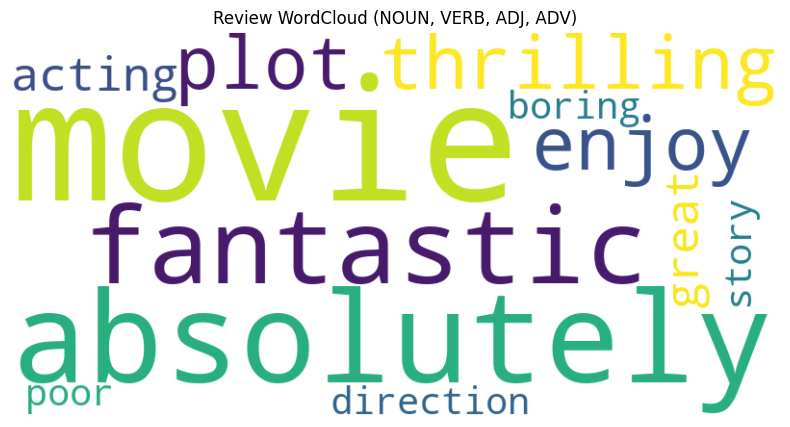

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 워드 클라우드 생성
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Review WordCloud (NOUN, VERB, ADJ, ADV)")
plt.show()


### Amazon Reviw Word cloud

In [70]:
import pandas as pd 
df = pd.read_csv("amazon_reviews.csv")
df

,title,date,body
0,Surprisingly Great!,"Reviewed in the United States on November 3, 2022",I’m writing this review because I am actually\...
1,Buy this instead of the fancy expensive ones,"Reviewed in the United States on May 29, 2025",We bought this water flosser in late 2022 and ...
2,Great while it lasts,"Reviewed in the United States on June 6, 2025",I bought this and enjoyed it for about a year ...
3,⭐️⭐️⭐️⭐️⭐️ Amazing Water Flosser – A Game Chan...,"Reviewed in the United States on June 1, 2025",I can’t believe I waited so long to get this w...
4,Replaced after emailing Nicwell customer servi...,"Reviewed in the United States on December 29, ...","For the first month, the water flosser was eve..."
5,Good water pick,"Reviewed in the United States on June 1, 2025",I love using this water flosser in the shower....
6,...,"Reviewed in the United States on August 29, 2022",My dental hygienist recommended one of these. ...
7,Updated review. Disappointed but seller stood ...,"Reviewed in the United States on April 3, 2025",I have had this water dental flosser for less ...
8,Charging your Nickwell Oral Irrigator,"Reviewed in the United States on May 13, 2025",I wrote a review previously and having issues ...
9,"Mixed experiences, but good customer service.","Reviewed in the United States on May 28, 2025",I have purchased two of these. One has been wo...


In [148]:
body_str

'writing this review because am actually Overly satisfied with this product There are many high quality brands that have similar water flossers with high price tags The price on this was relatively inexpensive so decided to try it knowing Amazon great return policy ve had it for just over week and borderline addicted to how good my teeth feel after using this along with normal brushing and mouthwash It legit just left the dentist feeling can say for the price it is good value and works great This comes with few extra standard heads specialized head with small brush for braces and tongue scraper primarily use the standard head which is just small jet that allows you to shoot the water stream between your teeth also have used the tongue scraper just to try it and it not bad Allows you to scrape your tongue while stream of water cleans and rinses Anyone who flosses regularly knows it sucks and can be gross Let face it you are ripping old food out of your teeth It necessary evil for health

In [87]:
all_words_body = (df['body']+' ').sum()
all_words_title = (df['title']+' ').sum()
type(all_words_title)
# text_for_wordcloud = ' '.join(all_words_body)
# text_for_wordcloud

str

### Regular Expresson

In [116]:
import re

text = "Hello! 안녕 123 ^&* Python is fun."

# 영어 소문자/대문자만 추출
english_only = re.findall(r'[A-Za-z]+', text)

print(english_only)

['Hello', 'Python', 'is', 'fun']


In [ ]:
body_cl = re.findall(r'[A-Za-z]+', all_words_body)
body_list = []
for w in body_cl:
    if len(w) > 1:
        body_list.append(w)
body_list
# ' '.join(body_cl)

['writing',
 'this',
 'review',
 'because',
 'am',
 'actually',
 'Overly',
 'satisfied',
 'with',
 'this',
 'product',
 'There',
 'are',
 'many',
 'high',
 'quality',
 'brands',
 'that',
 'have',
 'similar',
 'water',
 'flossers',
 'with',
 'high',
 'price',
 'tags',
 'The',
 'price',
 'on',
 'this',
 'was',
 'relatively',
 'inexpensive',
 'so',
 'decided',
 'to',
 'try',
 'it',
 'knowing',
 'Amazon',
 'great',
 'return',
 'policy',
 've',
 'had',
 'it',
 'for',
 'just',
 'over',
 'week',
 'and',
 'borderline',
 'addicted',
 'to',
 'how',
 'good',
 'my',
 'teeth',
 'feel',
 'after',
 'using',
 'this',
 'along',
 'with',
 'normal',
 'brushing',
 'and',
 'mouthwash',
 'It',
 'legit',
 'just',
 'left',
 'the',
 'dentist',
 'feeling',
 'can',
 'say',
 'for',
 'the',
 'price',
 'it',
 'is',
 'good',
 'value',
 'and',
 'works',
 'great',
 'This',
 'comes',
 'with',
 'few',
 'extra',
 'standard',
 'heads',
 'specialized',
 'head',
 'with',
 'small',
 'brush',
 'for',
 'braces',
 'and',
 'tong

In [123]:
body_str = ' '.join(body_list)

'writing this review because am actually Overly satisfied with this product There are many high quality brands that have similar water flossers with high price tags The price on this was relatively inexpensive so decided to try it knowing Amazon great return policy ve had it for just over week and borderline addicted to how good my teeth feel after using this along with normal brushing and mouthwash It legit just left the dentist feeling can say for the price it is good value and works great This comes with few extra standard heads specialized head with small brush for braces and tongue scraper primarily use the standard head which is just small jet that allows you to shoot the water stream between your teeth also have used the tongue scraper just to try it and it not bad Allows you to scrape your tongue while stream of water cleans and rinses Anyone who flosses regularly knows it sucks and can be gross Let face it you are ripping old food out of your teeth It necessary evil for health

In [90]:
def extract_morphemes(text, target_pos):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in target_pos and not token.is_stop]

In [136]:
words = extract_morphemes(all_words_title, [ "ADJ", "ADV"])
words_2 = extract_morphemes(body_str, ["ADJ", "ADV"])
words += words_2 


In [129]:
print(words)

['surprisingly', 'great', 'buy', 'instead', 'fancy', 'expensive', 'great', 'last', 'replace', 'email', '.thank', 'good', 'update', 'disappointed', 'stand', 'charge', 'mixed', 'good', 'absolutely', 'incredible', 'little', 'low', 'love', 'mighty', 'amazing', 'great', 'use', 'great', 'surprisingly', 'good', 'great', 'product', 'work', 'great', 'amazing', 'great', 'good', 'feel', 'clean', 'travel', 'easy', 'convenient', 'use', 'personal', 'great', 'buy', 'great', 'work', 'great', 'especially', 'go', 'floss', 'use', 'make', 'feel', 'extra', 'clean', 'highly', 'recommend', 'edit', 'clean', 'use', 'everyday', 'excellent', 'buy', 'write', 'actually', 'overly', 'satisfied', 'high', 'similar', 'high', 'relatively', 'inexpensive', 'decide', 'try', 'know', 'great', 'addict', 'good', 'feel', 'normal', 'legit', 'leave', 'good', 'work', 'great', 'come', 'extra', 'standard', 'specialize', 'small', 'primarily', 'use', 'standard', 'small', 'allow', 'shoot', 'try', 'bad', 'allow', 'scrape', 'rinse', 'flo

In [137]:
my_stop_words = ['great','buy','email','good','maybe','feel','try','use','last','think','work']
new_list = []
for w in words:
    if w not in my_stop_words:
        new_list.append(w)
print(new_list)

['surprisingly', 'instead', 'fancy', 'expensive', 'disappointed', 'mixed', 'absolutely', 'incredible', 'little', 'low', 'mighty', 'amazing', 'surprisingly', 'product', 'amazing', 'clean', 'easy', 'convenient', 'personal', 'especially', 'extra', 'clean', 'highly', 'recommend', 'clean', 'everyday', 'excellent', 'actually', 'overly', 'satisfied', 'high', 'similar', 'high', 'relatively', 'inexpensive', 'normal', 'extra', 'standard', 'small', 'primarily', 'standard', 'small', 'bad', 'regularly', 'gross', 'old', 'necessary', 'healthy', 'small', 'plastic', 'decent', 'dental', 'usually', 'well', 'quick', 'floss', 'different', 'standard', 'constant', 'aggressive', 'slightly', 'warm', 'cold', 'fun', 'warm', 'way', 'well', 'easy', 'exactly', 'literally', 'fresh', 'small', 'quickly', 'easy', 'wouldn', 'large', 'bulky', 'big', 'quickly', 'usually', 'second', 'round', 'careful', 'strong', 'awkward', 'well', 'easy', 'twice', 'low', 'sure', 'long', 'definitely', 'late', 'regularly', 'cheap', 'compact'

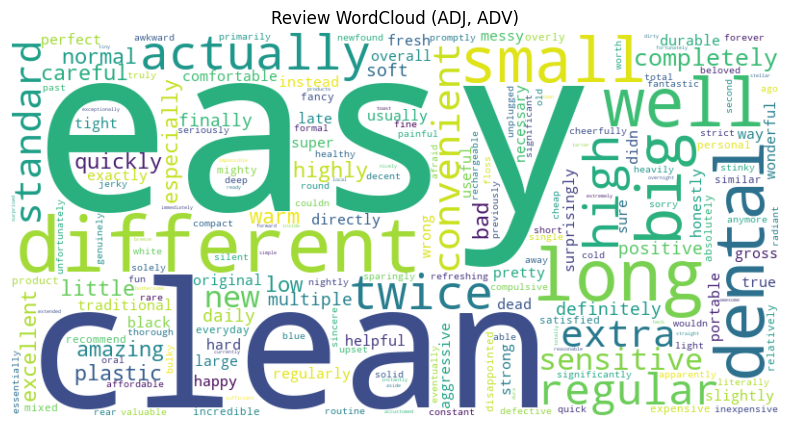

In [ ]:
text_for_wordcloud = ' '.join(new_list)
text_for_wordcloud

# 워드 클라우드 생성
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Nickwell - Review WordCloud (ADJ, ADV)")
plt.show()


In [106]:
from collections import Counter

word_counts = Counter(words)

In [ ]:
Conclusion 
This product is easy to use. 
long lasting 
but some opinion... twice... -> not clean?


In [147]:
print(df['body'].loc[df['body'].str.contains('twice')].sum())

I’m writing this review because I am actually
Overly satisfied with this product. There are many high quality brands that have similar “water flossers” with high price tags. The price on this was relatively inexpensive so I decided to try it knowing Amazon’s great return policy.

I’ve had it for just over a week and I’m borderline addicted to how good my teeth feel after using this along with normal brushing and mouthwash. It’s a legit “just left the dentist feeling” I can say for the price it is a good value and works great.

This comes with a few extra standard heads, a specialized head with small brush for braces and a tongue scraper. I primarily use the standard head which is just a small jet that allows you to shoot the water stream between your teeth. I also have used the tongue scraper just to try it and it’s not bad. Allows you to scrape your tongue while a stream of water cleans and rinses.

Anyone who flosses regularly knows it sucks and can be gross. Let’s face it, you are r

In [107]:
word_counts

Counter({'great': 34,
         'use': 30,
         'charge': 21,
         'easy': 20,
         'good': 19,
         'work': 19,
         'clean': 15,
         'feel': 14,
         'try': 12,
         'think': 11,
         'buy': 10,
         'love': 10,
         'floss': 10,
         'come': 9,
         'different': 9,
         'hold': 9,
         'go': 8,
         'long': 8,
         'need': 8,
         'know': 7,
         'dental': 7,
         'well': 7,
         'fill': 7,
         'stop': 7,
         'plug': 7,
         'get': 7,
         'last': 6,
         'replace': 6,
         'recommend': 6,
         'small': 6,
         'help': 6,
         'big': 6,
         'add': 6,
         'actually': 5,
         'high': 5,
         'decide': 5,
         'give': 5,
         'like': 5,
         'reach': 5,
         'regular': 5,
         'convenient': 4,
         'extra': 4,
         'standard': 4,
         'follow': 4,
         'stick': 4,
         'start': 4,
         'turn': 4,
        

In [109]:
top_10 = word_counts.most_common(10)
print(top_10)

[('great', 34), ('use', 30), ('charge', 21), ('easy', 20), ('good', 19), ('work', 19), ('clean', 15), ('feel', 14), ('try', 12), ('think', 11)]


In [110]:
print("📌 단어 빈도 Top 10:")
for word, count in top_10:
    print(f"{word:<12} → {count}회")


📌 단어 빈도 Top 10:
great        → 34회
use          → 30회
charge       → 21회
easy         → 20회
good         → 19회
work         → 19회
clean        → 15회
feel         → 14회
try          → 12회
think        → 11회


In [114]:
words

['surprisingly',
 'great',
 'buy',
 'instead',
 'fancy',
 'expensive',
 'great',
 'last',
 'replace',
 'email',
 '.thank',
 'good',
 'update',
 'disappointed',
 'stand',
 'charge',
 'mixed',
 'good',
 'absolutely',
 'incredible',
 'little',
 'low',
 'love',
 'mighty',
 'amazing',
 'great',
 'use',
 'great',
 'surprisingly',
 'good',
 'great',
 'product',
 'work',
 'great',
 'amazing',
 'great',
 'good',
 'feel',
 'clean',
 'travel',
 'easy',
 'convenient',
 'use',
 'personal',
 'great',
 'buy',
 'great',
 'work',
 'great',
 'especially',
 'go',
 'floss',
 'use',
 'make',
 'feel',
 'extra',
 'clean',
 'highly',
 'recommend',
 'edit',
 'clean',
 'use',
 'everyday',
 'excellent',
 'buy',
 'write',
 'actually',
 'overly',
 'satisfied',
 'high',
 'similar',
 'high',
 'relatively',
 'inexpensive',
 'decide',
 'try',
 'know',
 'great',
 'addict',
 'good',
 'feel',
 'normal',
 'leave',
 'good',
 'work',
 'great',
 'come',
 'extra',
 'standard',
 'specialized',
 'small',
 'primarily',
 'use',
 

### Second Product

In [203]:
# 2nd waterpick product - COSLUS Water Pick (#1 Best Seller)
driver.get("https://www.amazon.com/dp/B0BG52SJ5N")
time.sleep(3)

InvalidSessionIdException: Message: invalid session id
Stacktrace:
0   chromedriver                        0x000000010579c728 chromedriver + 5891880
1   chromedriver                        0x0000000105793e7a chromedriver + 5856890
2   chromedriver                        0x0000000105264243 chromedriver + 418371
3   chromedriver                        0x00000001052a770f chromedriver + 694031
4   chromedriver                        0x00000001052dc3e6 chromedriver + 910310
5   chromedriver                        0x00000001052d6dbd chromedriver + 888253
6   chromedriver                        0x00000001052d5f57 chromedriver + 884567
7   chromedriver                        0x000000010522d77f chromedriver + 194431
8   chromedriver                        0x000000010575a4d0 chromedriver + 5620944
9   chromedriver                        0x000000010575e45f chromedriver + 5637215
10  chromedriver                        0x00000001057358e2 chromedriver + 5470434
11  chromedriver                        0x000000010575edcf chromedriver + 5639631
12  chromedriver                        0x00000001057240a4 chromedriver + 5398692
13  chromedriver                        0x000000010522b957 chromedriver + 186711
14  dyld                                0x00007ff81405f530 start + 3056


In [ ]:
# 3. 리뷰 탭 클릭
driver.find_element(By.CSS_SELECTOR, "a[id='acrCustomerReviewLink']").click()
    # this works before logging in 
time.sleep(3)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a[id='acrCustomerReviewLink']"}
  (Session info: chrome=137.0.7151.104); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x000000010579c728 chromedriver + 5891880
1   chromedriver                        0x0000000105793e7a chromedriver + 5856890
2   chromedriver                        0x0000000105264400 chromedriver + 418816
3   chromedriver                        0x00000001052b622b chromedriver + 754219
4   chromedriver                        0x00000001052b6441 chromedriver + 754753
5   chromedriver                        0x0000000105306cd4 chromedriver + 1084628
6   chromedriver                        0x00000001052dc50d chromedriver + 910605
7   chromedriver                        0x0000000105304073 chromedriver + 1073267
8   chromedriver                        0x00000001052dc2b3 chromedriver + 910003
9   chromedriver                        0x00000001052a8507 chromedriver + 697607
10  chromedriver                        0x00000001052a9171 chromedriver + 700785
11  chromedriver                        0x000000010575a4d0 chromedriver + 5620944
12  chromedriver                        0x000000010575e45f chromedriver + 5637215
13  chromedriver                        0x00000001057358e2 chromedriver + 5470434
14  chromedriver                        0x000000010575edcf chromedriver + 5639631
15  chromedriver                        0x00000001057240a4 chromedriver + 5398692
16  chromedriver                        0x0000000105781688 chromedriver + 5781128
17  chromedriver                        0x0000000105781850 chromedriver + 5781584
18  chromedriver                        0x0000000105793a41 chromedriver + 5855809
19  libsystem_pthread.dylib             0x00007ff814404df1 _pthread_start + 99
20  libsystem_pthread.dylib             0x00007ff814400857 thread_start + 15


In [ ]:
# 4. 리뷰 수집
reviews_coslus = []
page = 1
max_pages = 5  # 최대 5페이지까지 수집

while page <= max_pages:
    print(f"📄 페이지 {page} 수집 중...")

    review_elements = driver.find_elements(By.CSS_SELECTOR, "li[data-hook='review']")
    for r in review_elements:
        try:
            # 제목
            title = r.find_element(By.CSS_SELECTOR, "[data-hook='review-title']").text.strip()

            # 날짜
            date = r.find_element(By.CSS_SELECTOR, "[data-hook='review-date']").text.strip()

            # 본문
            body = r.find_element(By.CSS_SELECTOR, "[data-hook='review-body']").text.strip()

            reviews_coslus.append({
                # "rating": rating,
                "title": title,
                "date": date,
                "body": body
            })

        except Exception as e:
            print("❌ 리뷰 파싱 실패:", e)
            continue

    # 다음 페이지 버튼 클릭
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, "li.a-last a")
        next_button.click()
        page += 1
        time.sleep(3)
    except NoSuchElementException:
        print("⛔️ 더 이상 다음 페이지가 없습니다.")
        break

# 5. 결과 보기
df2 = pd.DataFrame(reviews_coslus)
print(df2)

# 6. 저장
df2.to_csv("amazon_reviews_coslus.csv", index=False)

# driver.quit()


📄 페이지 1 수집 중...
📄 페이지 2 수집 중...
📄 페이지 3 수집 중...
📄 페이지 4 수집 중...
📄 페이지 5 수집 중...
⛔️ 더 이상 다음 페이지가 없습니다.
                                                title  \
0                                       Great Product   
1                  Pretty good, with room to improve.   
2                      A fine product at a good price   
3                       3 modos para diferentes usos!   
4                  Great for Travel and Every Day Use   
5                     Great Tool for Home Dental Care   
6                                       great support   
7                 EXCELLENT PRODUCT. WOULD BUY AGAIN!   
8                             Glad I picked this one.   
9                                            Powerful   
10                                       Works Great!   
11                                            Durable   
12                                I really do like it   
13                                 Works like a charm   
14                                       Go

In [204]:
df2.head()

,title,date,body
0,Great Product,"Reviewed in the United States on May 23, 2025",I have had this water flosser for 2 months now...
1,"Pretty good, with room to improve.","Reviewed in the United States on June 1, 2025",Vendor was a 5 out of 5. Product is 3.5 out of...
2,A fine product at a good price,"Reviewed in the United States on May 13, 2025","This product is exceptional, and I highly reco..."
3,3 modos para diferentes usos!,"Reviewed in the United States on June 8, 2025",Producto excelente. 3 modos de operación para ...
4,Great for Travel and Every Day Use,"Reviewed in the United States on June 7, 2025",This portable water pick works great and is so...


In [ ]:
all_words_body_coslus = (df2['body']+' ').sum()
all_words_title_coslus = (df2['title']+' ').sum()
type(all_words_title_coslus)

str

In [ ]:
body_cl_coslus = re.findall(r'[A-Za-z]+', all_words_body_coslus)
body_list_coslus = []
for w in body_cl_coslus:
    if len(w) > 1:
        body_list_coslus.append(w)
body_list_coslus

['have',
 'had',
 'this',
 'water',
 'flosser',
 'for',
 'months',
 'now',
 'It',
 'game',
 'changer',
 'have',
 'only',
 'had',
 'to',
 'charge',
 'it',
 'the',
 'initial',
 'time',
 'The',
 'different',
 'settings',
 'are',
 'nice',
 'depending',
 'on',
 'how',
 'sensitive',
 'your',
 'gums',
 'are',
 'never',
 'realized',
 'how',
 'much',
 'cleaner',
 'in',
 'between',
 'my',
 'teeth',
 'could',
 'be',
 'until',
 'started',
 'using',
 'this',
 'like',
 'that',
 'you',
 'can',
 'take',
 'it',
 'with',
 'you',
 'if',
 'you',
 'travel',
 'and',
 'it',
 'seems',
 'to',
 'be',
 'very',
 'well',
 'made',
 'highly',
 'recommend',
 'this',
 'product',
 'Vendor',
 'was',
 'out',
 'of',
 'Product',
 'is',
 'out',
 'of',
 'five',
 'It',
 'convenient',
 'and',
 'all',
 'but',
 'it',
 'does',
 'not',
 'generate',
 'the',
 'pressure',
 'you',
 'would',
 'get',
 'from',
 'corded',
 'unit',
 'with',
 'larger',
 'water',
 'reservior',
 'which',
 'would',
 'alos',
 'be',
 'an',
 'improvement',
 'This

In [ ]:
body_str_coslus = ' '.join(body_list_coslus)

In [ ]:
words_coslus = extract_morphemes(all_words_title_coslus, [ "ADJ", "ADV"])
words_body_coslus = extract_morphemes(body_str_coslus, ["ADJ", "ADV"])
words_coslus += words_body_coslus 

In [ ]:
words_counts_coslus = Counter(words_coslus)

In [ ]:
top_10_coslus = words_counts_coslus.most_common(10)
print(top_10_coslus)

[('great', 24), ('easy', 21), ('good', 16), ('highly', 9), ('clean', 7), ('different', 7), ('soft', 7), ('long', 6), ('well', 6), ('nice', 6)]


In [ ]:
print("📌 단어 빈도 Top 10:")
for word, count in top_10_coslus:
    print(f"{word:<12} → {count}회")

📌 단어 빈도 Top 10:
great        → 24회
easy         → 21회
good         → 16회
highly       → 9회
clean        → 7회
different    → 7회
soft         → 7회
long         → 6회
well         → 6회
nice         → 6회


In [ ]:
my_stop_words_coslus = ['highly', 'different', 'great', 'good', 'little', 'well', 'nice', 'amazing']
new_list_coslus = []
for w in words_coslus:
    if w not in my_stop_words_coslus:
        new_list_coslus.append(w)
print(new_list_coslus)

['pretty', 'fine', 'usos', 'product', 'powerful', 'durable', 'charm', 'useful', 'long', 'super', 'easy', 'directly', 'clean', 'easy', 'recognizable', 'easy', 'worth', 'initial', 'sensitive', 'clean', 'convenient', 'large', 'exceptional', 'especially', 'periodontal', 'fine', 'easy', 'soft', 'correctly', 'reasonable', 'carefully', 'dental', 'portable', 'convenient', 'regular', 'constantly', 'proactive', 'big', 'important', 'daily', 'dental', 'thorough', 'product', 'absolutely', 'simple', 'easy', 'multiple', 'forever', 'ago', 'old', 'amazed', 'seriously', 'soft', 'high', 'strong', 'soft', 'powerful', 'pretty', 'loud', 'skeptical', 'truly', 'far', 'multiple', 'quickly', 'easy', 'ish', 'certainly', 'durable', 'incredible', 'inevitably', 'oral', 'right', 'far', 'usually', 'soft', 'oral', 'ample', 'satisfied', 'quick', 'properly', 'overall', 'dental', 'outstanding', 'easy', 'useful', 'outstanding', 'recent', 'promptly', 'accurate', 'easily', 'easy', 'large', 'easy', 'limited', 'easy', 'recomm

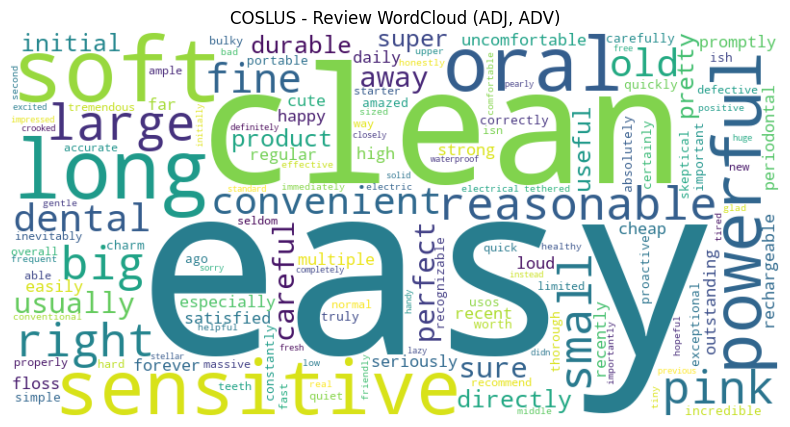

In [ ]:
text_for_wordcloud_2 = ' '.join(new_list_coslus)
text_for_wordcloud_2

# 워드 클라우드 생성
wc = WordCloud(width=800, height=400, background_color="white").generate(text_for_wordcloud_2)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("COSLUS - Review WordCloud (ADJ, ADV)")
plt.show()

This result shows  
the product is easy to use, get clean tooth, and powerful water pick 

### define emotional word dictionary 
- positive: great, good 
- negative: massive 

In [193]:
emo_dict = {"positive":['good','well','great'],'negative':['bulky', 'massive', 'skeptical', 'crooked']}

In [197]:
words_counts_coslus.keys()

dict_keys(['great', 'pretty', 'good', 'fine', 'usos', 'product', 'powerful', 'durable', 'charm', 'useful', 'long', 'super', 'easy', 'directly', 'amazing', 'clean', 'well', 'recognizable', 'worth', 'initial', 'different', 'nice', 'sensitive', 'highly', 'convenient', 'large', 'exceptional', 'especially', 'periodontal', 'soft', 'correctly', 'reasonable', 'carefully', 'dental', 'portable', 'regular', 'constantly', 'proactive', 'big', 'important', 'daily', 'thorough', 'absolutely', 'simple', 'multiple', 'forever', 'ago', 'old', 'amazed', 'seriously', 'high', 'strong', 'loud', 'skeptical', 'truly', 'far', 'quickly', 'ish', 'certainly', 'incredible', 'inevitably', 'oral', 'right', 'usually', 'ample', 'satisfied', 'quick', 'properly', 'overall', 'outstanding', 'recent', 'promptly', 'accurate', 'easily', 'limited', 'recommend', 'new', 'little', 'normal', 'way', 'hard', 'massive', 'able', 'tremendous', 'small', 'seldom', 'away', 'happy', 'teeth', 'bulky', 'rechargeable', 'fast', 'careful', 'star

In [201]:
pos_cnt = 0 
neg_cnt = 0 
for w in words_counts_coslus.keys():
    # print(w,words_counts_coslus[w])
    if w in emo_dict['positive']:
        pos_cnt += words_counts_coslus[w]
    elif w in emo_dict['negative']:
        neg_cnt += words_counts_coslus[w]
print(pos_cnt, neg_cnt)


46 4


### Results


### Discussion